# **SMS Spam Classification**

The followings are the main steps required to develop the classification system:

1.Reading dataset

2.Exploratory data analysis

3.Text preprocessing

4.Preparing the dataset

5.Classification model development

6.Performance evaluation

7.Error analysis


# **Step 1: Reading Dataset**

The dataset contains sms messages with labels; spam and ham



In [1]:
# Libraries needed to read the files
import pandas as pd

# Reading the dataset 
dataset = pd.read_csv("spam.csv", encoding='utf_8')

# Viewing the data to check its format
dataset.head()

,v1,v2
0,لعيون الغالية تخفيضات حتى 35% يوم الجمعة 20/3 ...,spam
1,مع بيكوفي رمضان تخفيضات تبدأمن7%وتصل حتي 15%عل...,spam
2,لضمان تفوقك احرص علي مراجعات التركيز النهائيه ...,spam
3,لحدي المحاضرة السادسة,ham
4,والميدتيرم حيكون لحد لكشر كم؟,ham


In [2]:
#Gives a describtive names for the data
dataset=dataset.rename(columns={"v2":"label","v1":"sms"})
dataset.head()

,sms,label
0,لعيون الغالية تخفيضات حتى 35% يوم الجمعة 20/3 ...,spam
1,مع بيكوفي رمضان تخفيضات تبدأمن7%وتصل حتي 15%عل...,spam
2,لضمان تفوقك احرص علي مراجعات التركيز النهائيه ...,spam
3,لحدي المحاضرة السادسة,ham
4,والميدتيرم حيكون لحد لكشر كم؟,ham


# **Step 2: Exploratory Data Analysis**

In this step, we will analyze the data to better understand its content. The following tasks are included in this step:

1.Counting the number of words per message.

2.Counting the number of characters per message.

3.The average number of characters per message.

4.Counting the number of stop words per message.

5.Overall dataset statistics.


In [3]:
# Required libraries
import nltk
nltk.download('stopwords') #from nltk.corpus import stopwords
stop = set(nltk.corpus.stopwords.words("arabic"))

# Text length analysis 
def avg_word(sentence):
    words = sentence.split()
    if len(words) == 0:
        return 0
    return (sum(len(word) for word in words)/len(words))


dataset['word_count'] = dataset['sms'].apply(lambda x: len(str(x).split(" ")))
dataset['char_count'] = dataset['sms'].str.len() ## this also includes spaces
dataset['avg_char_per_word'] = dataset['sms'].apply(lambda x: avg_word(x))
#stop = stopwords.words('arabic')
dataset['stopwords'] = dataset['sms'].apply(lambda x: len([x for x in x.split() if x in stop]))
dataset = dataset.sort_values(by='word_count',ascending=[0])
dataset.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,sms,label,word_count,char_count,avg_char_per_word,stopwords
96,اللهم يامن اطلقت السماء بالخيرات ... واجريت ال...,ham,66,410,5.227273,6
291,عميلنا العزيز .. الان نقدم لك عبر تطبيق بنكك م...,spam,50,293,4.840000,6
146,تعلن كلية الافق عن وجود فرص في تخصصات الطب تم...,spam,46,257,5.047619,2
237,مع باقات زين الشير الجديدة، حتحتار وإنت بتختا...,spam,45,234,4.523810,10
257,عزيزي مشترك سوداني، اشترك في باقة الاتصال العا...,spam,42,267,5.380952,6


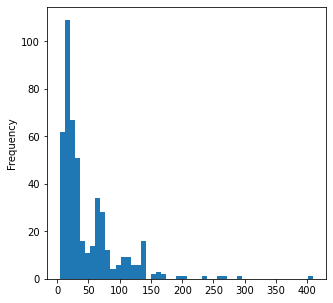

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset['char_count'].plot(bins=50, kind='hist', figsize=(5,5) )

In [5]:
# Overall averages of each numeric column 
dataset_stat = dataset.mean(axis=0)
dataset_stat

<ipython-input-5-275e536a638a>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset_stat = dataset.mean(axis=0)


word_count            8.345992
char_count           47.181435
avg_char_per_word     4.690919
stopwords             1.240506
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdcf52c2e80>,
      dtype=object)

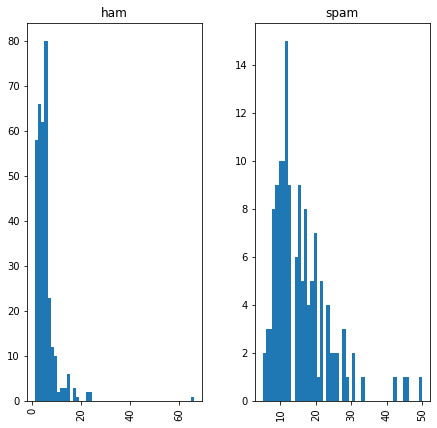

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

dataset.hist(column='word_count', by='label', bins=50, figsize=(7,7) )

In [ ]:
#This code for saving the current version of our data whenever we want
# to download the dataset
from google.colab import files

dataset.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

From the manual inspection, we will select the preprocessing techniques that better fit our task and dataset.




# **Step 3: Text Preprocessing**

We perform basic text preprocessing steps including the following:

1.Stop words removal

2.Normalization

3.Removing punctuations

4.Noise removal


**Stop Words Removal:**

In [7]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize

import nltk
nltk.download('stopwords')
stop = set(nltk.corpus.stopwords.words("arabic"))

def stopRemoval(text):
    tempsms = word_tokenize(text)
    text = " ".join([w for w in tempsms if not w in stop and len(w) >= 2])
    return text

dataset['noStop_sms'] = dataset['sms'].apply(lambda x:stopRemoval(x))
dataset.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,sms,label,word_count,char_count,avg_char_per_word,stopwords,noStop_sms
96,اللهم يامن اطلقت السماء بالخيرات ... واجريت ال...,ham,66,410,5.227273,6,اللهم يامن اطلقت السماء بالخيرات ... واجريت ال...
291,عميلنا العزيز .. الان نقدم لك عبر تطبيق بنكك م...,spam,50,293,4.840000,6,عميلنا العزيز .. الان نقدم عبر تطبيق بنكك ميزة...
146,تعلن كلية الافق عن وجود فرص في تخصصات الطب تم...,spam,46,257,5.047619,2,تعلن كلية الافق وجود فرص تخصصات الطب تمريض مخت...
237,مع باقات زين الشير الجديدة، حتحتار وإنت بتختا...,spam,45,234,4.523810,10,باقات زين الشير الجديدة، حتحتار وإنت بتختار ال...
257,عزيزي مشترك سوداني، اشترك في باقة الاتصال العا...,spam,42,267,5.380952,6,عزيزي مشترك سوداني، اشترك باقة الاتصال العالمي...


**Normalization:**

In [8]:
# Required libraries
import re

def normalize(text):
    # remove three or more repetitions of any character
    pattern = re.compile(r"(.)\1{2,}", re.DOTALL)
    text=pattern.sub(r"\1\1", text)
    # normalize alif
    text = text.replace(u"\u0625", u"\u0627")  # HAMZA below, with LETTER ALEF
    #text = text.replace(u"\u0621", u"\u0627")  # HAMZA, with LETTER ALEF
    text = text.replace(u"\u0622", u"\u0627")  # ALEF WITH MADDA ABOVE, with LETTER ALEF
    text = text.replace(u"\u0623", u"\u0627")  # ALEF WITH HAMZA ABOVE, with LETTER ALEF
    # normalize taa
    text=text.replace(u"\u0629", u"\u0647") # taa' marbuuTa, with haa'
    # normalize yaa
    text = text.replace(u"\u064A", u"\u0649")  # yaa' with 'alif maqSuura
    # remove diacritics 
    text = text.replace(u"\u064B", "")  # fatHatayn
    text = text.replace(u"\u064C", "")  # Dammatayn
    text = text.replace(u"\u064D", "")  # kasratayn
    text = text.replace(u"\u064E", "")  # fatHa
    text = text.replace(u"\u064F", "")  # Damma
    text = text.replace(u"\u0650", "")  # kasra
    text = text.replace(u"\u0651", "")  # shaddah
    text = text.replace(u"\u0652", "")  # sukuun
    text = text.replace(u"\u0670", "`")  # dagger 'alif
    return text

dataset['normalized_sms'] = dataset['sms'].apply(lambda x: normalize(x))

# aggregate all preprocessing steps into one column for the next step
dataset['text'] = dataset['noStop_sms'].apply(lambda x:normalize(x))

dataset.head()

,sms,label,word_count,char_count,avg_char_per_word,stopwords,noStop_sms,normalized_sms,text
96,اللهم يامن اطلقت السماء بالخيرات ... واجريت ال...,ham,66,410,5.227273,6,اللهم يامن اطلقت السماء بالخيرات ... واجريت ال...,اللهم ىامن اطلقت السماء بالخىرات .. واجرىت الس...,اللهم ىامن اطلقت السماء بالخىرات .. واجرىت الس...
291,عميلنا العزيز .. الان نقدم لك عبر تطبيق بنكك م...,spam,50,293,4.840000,6,عميلنا العزيز .. الان نقدم عبر تطبيق بنكك ميزة...,عمىلنا العزىز .. الان نقدم لك عبر تطبىق بنكك م...,عمىلنا العزىز .. الان نقدم عبر تطبىق بنكك مىزه...
146,تعلن كلية الافق عن وجود فرص في تخصصات الطب تم...,spam,46,257,5.047619,2,تعلن كلية الافق وجود فرص تخصصات الطب تمريض مخت...,تعلن كلىه الافق عن وجود فرص فى تخصصات الطب تم...,تعلن كلىه الافق وجود فرص تخصصات الطب تمرىض مخت...
237,مع باقات زين الشير الجديدة، حتحتار وإنت بتختا...,spam,45,234,4.523810,10,باقات زين الشير الجديدة، حتحتار وإنت بتختار ال...,مع باقات زىن الشىر الجدىده، حتحتار وانت بتختا...,باقات زىن الشىر الجدىده، حتحتار وانت بتختار ال...
257,عزيزي مشترك سوداني، اشترك في باقة الاتصال العا...,spam,42,267,5.380952,6,عزيزي مشترك سوداني، اشترك باقة الاتصال العالمي...,عزىزى مشترك سودانى، اشترك فى باقه الاتصال العا...,عزىزى مشترك سودانى، اشترك باقه الاتصال العالمى...


**Removing Punctuations:**

In [9]:
# Required libraries
import string 
import re

arabicPunctuations = [".","`","؛","<",">","(",")","*","&","^","%","]","[",",","ـ","،","/",":","؟",".","'","{","}","~","|","!","”","…","“","–"] # defining customized punctuation marks
englishPunctuations = string.punctuation # importing English punctuation marks
englishPunctuations = [word.strip() for word in englishPunctuations] # converting the English punctuation from a string to array for processing
punctuationsList = arabicPunctuations + englishPunctuations # creating a list of all punctuation marks

def removingPunctuation(text):
  cleanTweet = ''
  for i in text:
    if i not in arabicPunctuations:
      cleanTweet = cleanTweet + '' + i 
  return cleanTweet

dataset['noPunc_sms'] = dataset['sms'].apply(lambda x: removingPunctuation(x))
dataset['text'] = dataset['text'].apply(lambda x: removingPunctuation(x))


dataset.sample(5)

,sms,label,word_count,char_count,avg_char_per_word,stopwords,noStop_sms,normalized_sms,text,noPunc_sms
118,العمرة من وكالة تباشير اقتصادي و vip خيارات لك...,spam,23,130,5.142857,4,العمرة وكالة تباشير اقتصادي vip خيارات لكل الف...,العمره من وكاله تباشىر اقتصادى و vip خىارات لك...,العمره وكاله تباشىر اقتصادى vip خىارات لكل الف...,العمرة من وكالة تباشير اقتصادي و vip خيارات لك...
307,جهاز تنظيم الاتصالات والبريد يهنئكم بمناسبة ال...,spam,9,67,6.555556,0,جهاز تنظيم الاتصالات والبريد يهنئكم بمناسبة ال...,جهاز تنظىم الاتصالات والبرىد ىهنئكم بمناسبه ال...,جهاز تنظىم الاتصالات والبرىد ىهنئكم بمناسبه ال...,جهاز تنظيم الاتصالات والبريد يهنئكم بمناسبة ال...
57,تعرف على هوية المتصل بك فوراً قبل الاجابة عب...,spam,15,64,3.846154,4,تعرف هوية المتصل فوراً الاجابة عبر إرسال 5868,تعرف على هوىه المتصل بك فورا قبل الاجابه عبر...,تعرف هوىه المتصل فورا الاجابه عبر ارسال 5868,تعرف على هوية المتصل بك فوراً قبل الاجابة عب...
259,تم نفاد حصة الانترنت اليومية،ننصح بإعادة الإشت...,spam,8,56,6.125000,0,تم نفاد حصة الانترنت اليومية،ننصح بإعادة الإشت...,تم نفاد حصه الانترنت الىومىه،ننصح باعاده الاشت...,تم نفاد حصه الانترنت الىومىهننصح باعاده الاشتر...,تم نفاد حصة الانترنت اليوميةننصح بإعادة الإشتر...
134,إبدأ مشوارك العملي مع كورسات منصة كبسولة https...,spam,8,68,7.625000,1,إبدأ مشوارك العملي كورسات منصة كبسولة https //...,ابدا مشوارك العملى مع كورسات منصه كبسوله https...,ابدا مشوارك العملى كورسات منصه كبسوله https ti...,إبدأ مشوارك العملي مع كورسات منصة كبسولة https...


**Noise removal:**
Noise includes miscellaneous items any content that might be redundant or not important to the task we are performing. In this example, removing digits and extra spaces were included.

In [10]:
def clean(text):
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text)  
    # Remove numbers
    text = re.sub("\d+", " ", text)
    return text

dataset['clean_sms'] = dataset['sms'].apply(lambda x:clean(x))
dataset['text'] = dataset['text'].apply(lambda x:clean(x))


dataset.sample(5)

,sms,label,word_count,char_count,avg_char_per_word,stopwords,noStop_sms,normalized_sms,text,noPunc_sms,clean_sms
470,النرجسية في ابهى صورها,ham,4,22,4.750000,1,النرجسية ابهى صورها,النرجسىه فى ابهى صورها,النرجسىه ابهى صورها,النرجسية في ابهى صورها,النرجسية في ابهى صورها
118,العمرة من وكالة تباشير اقتصادي و vip خيارات لك...,spam,23,130,5.142857,4,العمرة وكالة تباشير اقتصادي vip خيارات لكل الف...,العمره من وكاله تباشىر اقتصادى و vip خىارات لك...,العمره وكاله تباشىر اقتصادى vip خىارات لكل الف...,العمرة من وكالة تباشير اقتصادي و vip خيارات لك...,العمرة من وكالة تباشير اقتصادي و vip خيارات لك...
375,مشتاقين يا جميل,ham,3,15,4.333333,1,مشتاقين جميل,مشتاقىن ىا جمىل,مشتاقىن جمىل,مشتاقين يا جميل,مشتاقين يا جميل
75,ح تحضري الكورة؟,ham,3,15,4.333333,1,تحضري الكورة؟,ح تحضرى الكوره؟,تحضرى الكوره,ح تحضري الكورة,ح تحضري الكورة؟
461,قبيل لاقيت خالو عماد وبسلم عليك,ham,6,31,4.333333,1,قبيل لاقيت خالو عماد وبسلم,قبىل لاقىت خالو عماد وبسلم علىك,قبىل لاقىت خالو عماد وبسلم,قبيل لاقيت خالو عماد وبسلم عليك,قبيل لاقيت خالو عماد وبسلم عليك


In [ ]:
from google.colab import files

dataset.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Step 4: Preparing the Dataset**
In this step, the dataset will be splitted into a train set to develop the classifier and a test set to evaluate and test the classifier. It is always better to have a validation set, which help to adjust the parameters and setting of the experiments to boost the performance. However, for the purpose of this workshop, we will only have two sets; train and test.

In [11]:
# convert labels from categorical to numeric
dataset.loc[:,'label']=dataset.label.map({'ham':0, 'spam':1})
dataset.head()

,sms,label,word_count,char_count,avg_char_per_word,stopwords,noStop_sms,normalized_sms,text,noPunc_sms,clean_sms
96,اللهم يامن اطلقت السماء بالخيرات ... واجريت ال...,0,66,410,5.227273,6,اللهم يامن اطلقت السماء بالخيرات ... واجريت ال...,اللهم ىامن اطلقت السماء بالخىرات .. واجرىت الس...,اللهم ىامن اطلقت السماء بالخىرات واجرىت السحب ...,اللهم يامن اطلقت السماء بالخيرات واجريت السحب...,اللهم يامن اطلقت السماء بالخيرات ... واجريت ال...
291,عميلنا العزيز .. الان نقدم لك عبر تطبيق بنكك م...,1,50,293,4.840000,6,عميلنا العزيز .. الان نقدم عبر تطبيق بنكك ميزة...,عمىلنا العزىز .. الان نقدم لك عبر تطبىق بنكك م...,عمىلنا العزىز الان نقدم عبر تطبىق بنكك مىزه اض...,عميلنا العزيز الان نقدم لك عبر تطبيق بنكك ميز...,عميلنا العزيز .. الان نقدم لك عبر تطبيق بنكك م...
146,تعلن كلية الافق عن وجود فرص في تخصصات الطب تم...,1,46,257,5.047619,2,تعلن كلية الافق وجود فرص تخصصات الطب تمريض مخت...,تعلن كلىه الافق عن وجود فرص فى تخصصات الطب تم...,تعلن كلىه الافق وجود فرص تخصصات الطب تمرىض مخت...,تعلن كلية الافق عن وجود فرص في تخصصات الطب تم...,تعلن كلية الافق عن وجود فرص في تخصصات الطب تمر...
237,مع باقات زين الشير الجديدة، حتحتار وإنت بتختا...,1,45,234,4.523810,10,باقات زين الشير الجديدة، حتحتار وإنت بتختار ال...,مع باقات زىن الشىر الجدىده، حتحتار وانت بتختا...,باقات زىن الشىر الجدىده حتحتار وانت بتختار الب...,مع باقات زين الشير الجديدة حتحتار وإنت بتختار...,مع باقات زين الشير الجديدة، حتحتار وإنت بتختا...
257,عزيزي مشترك سوداني، اشترك في باقة الاتصال العا...,1,42,267,5.380952,6,عزيزي مشترك سوداني، اشترك باقة الاتصال العالمي...,عزىزى مشترك سودانى، اشترك فى باقه الاتصال العا...,عزىزى مشترك سودانى اشترك باقه الاتصال العالمى ...,عزيزي مشترك سوداني اشترك في باقة الاتصال العال...,عزيزي مشترك سوداني، اشترك في باقة الاتصال العا...


**Shuffle the dataset to reduce bias**

In [12]:
# shuffle will help to reduce bias
from sklearn.utils import shuffle
dataset = shuffle(dataset)

**Feature extraction:**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer # converts text data to matrix of token counts.
count_vector = CountVectorizer()

text=count_vector.fit_transform(dataset['text'])



**Spliting the** **data**

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(text , dataset['label'], test_size=0.20, random_state=42)


 **Putting the train and test datasets in a form for analysis**

In [15]:
import pandas as pd
data = {'text':x_train, #text.get_feature_names_out(x_train)
        'label': y_train}

train = pd.DataFrame(data)

data = {'text': x_test,
        'label': y_test}

test = pd.DataFrame(data)

Ensuring the combatibility of the dataset, training dataset and testing dataset.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


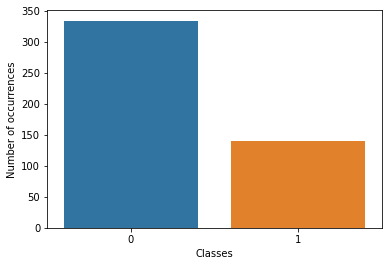

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


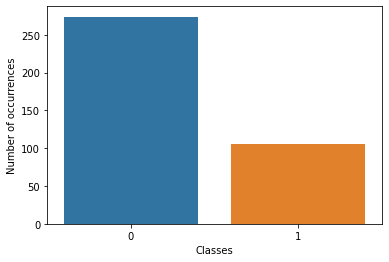

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


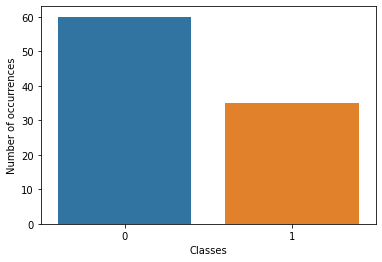

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

#The whole dataset
sns.countplot(dataset.iloc[:,1])
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.show()

#Training dataset
sns.countplot(train.iloc[:,1])
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.show()

#Testing dataset
sns.countplot(test.iloc[:,1])
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.show()

It is important to make sure that all sets have similar distribution of classes as it the case in this example. We will also need to convert the labels from categorical type to numeric type.

We only need the fully preprocessed text and the numeric label to be passed to the next step.

# **Step 5: Classification Model Development**
During this step, the classifier is created using the training set and is used to predict the labels of the testing set. For the purpose of this workshop, we only develop one traditional machine learning classifier, which is the logistic regression.

**Create a classification pipeline**

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer 
#transoforms count matrix to tf-idf representation
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())


**Trainig the model**

In [18]:
model = MultinomialNB().fit(x_train, y_train)

In [19]:
# Execute prediction(classification).
prediction=model.predict(x_test)
print(prediction)

[1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1
 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0]


# **Step 6: Performance Evaluation**

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("Multinomial NB")
print("Accuracy score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision score: {}". format(precision_score(y_test, prediction)) )
print("Recall score: {}". format(recall_score(y_test, prediction)))
print("F1 score: {}". format(f1_score(y_test, prediction)))

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test,prediction))

#print accuracy score
print('accuracy_score= %',accuracy_score(y_test,prediction)*100)
     

Multinomial NB
Accuracy score: 0.9052631578947369
Precision score: 0.9333333333333333
Recall score: 0.8
F1 score: 0.8615384615384616
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        60
           1       0.93      0.80      0.86        35

    accuracy                           0.91        95
   macro avg       0.91      0.88      0.89        95
weighted avg       0.91      0.91      0.90        95

[[58  2]
 [ 7 28]]
accuracy_score= % 90.52631578947368


              precision    recall  f1-score   support

           0       0.89      0.97      0.93        60
           1       0.93      0.80      0.86        35

    accuracy                           0.91        95
   macro avg       0.91      0.88      0.89        95
weighted avg       0.91      0.91      0.90        95



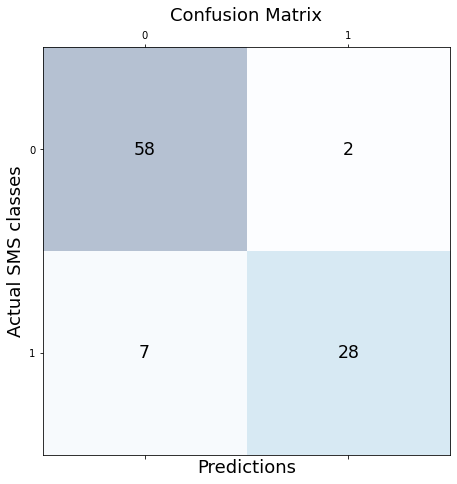

In [22]:
print(classification_report(y_test, prediction))
conf_matrix = confusion_matrix(y_test,prediction)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actual SMS classes', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

**Confusion matrix**

# **Step 7: Error Analysis**
In this example, manual error analysis conduced by personal inspection is the technique we recommend for beginners in text classification. Checking the misclassified tweets from each class can help to detect sources of noise and items that are difficult to understand for the classification model.

In [ ]:
# printing misclassified spam messages
test['Prediction'] = prediction
spam_error = test[(test['Prediction'] != test['label']) & (test['label'] == 1)]
spam_error

,text,label,Prediction
254,"(0, 1239)\t1\n (0, 1102)\t1\n (0, 860)\t1\...",1,0
157,"(0, 964)\t1\n (0, 1980)\t1\n (0, 1206)\t1\...",1,0
239,"(0, 950)\t1\n (0, 1239)\t1\n (0, 1563)\t1\...",1,0
251,"(0, 399)\t1\n (0, 391)\t1\n (0, 657)\t1\n ...",1,0
136,"(0, 76)\t1\n (0, 1533)\t1\n (0, 1867)\t1\n...",1,0
5,"(0, 154)\t1\n (0, 274)\t1\n (0, 1493)\t1\n...",1,0
10,"(0, 373)\t1\n (0, 478)\t1\n (0, 148)\t1\n ...",1,0


In [ ]:
# printing misclassified ham messages
test['Prediction'] = prediction
ham_error = test[(test['Prediction'] != test['label']) & (test['label'] == 0)]
ham_error


,text,label,Prediction
74,"(0, 1750)\t1\n (0, 1174)\t1\n (0, 627)\t1",0,1


You can download each tables of misclassified samples as the following to further investigate the content. You might receive a prompt message from Google Colab to allow for multiple file's downloads.

In [ ]:

from google.colab import files

spam_error.to_csv('spam_error.csv', encoding = 'utf-8-sig') 
files.download('spam_error.csv')

ham_error.to_csv('ham_error.csv', encoding = 'utf-8-sig') 
files.download('ham_error.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>